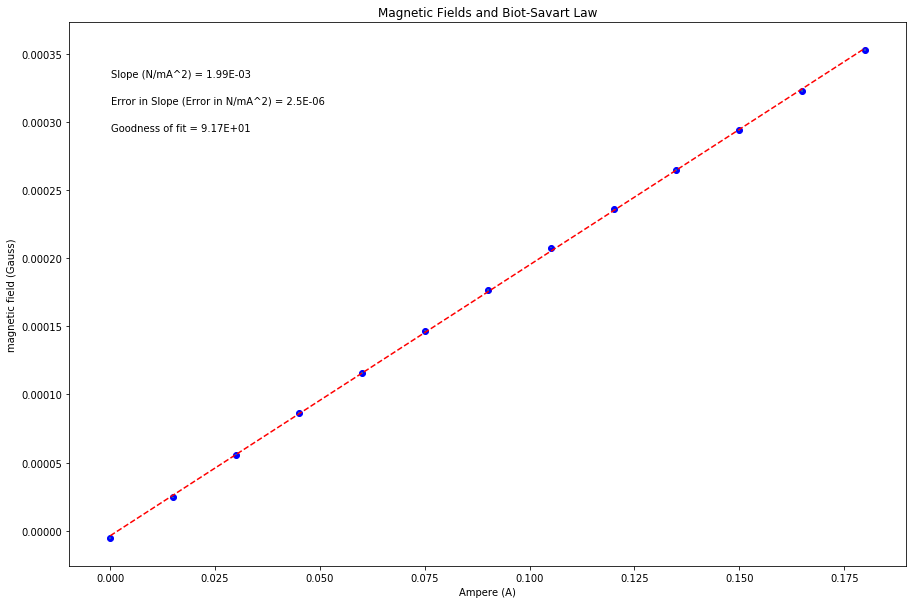

In [24]:
#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
%matplotlib inline
#Import packages and libraries needed and give them shortcut names
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
Amp = np.array([0,0.015,0.03,0.045,0.06,0.075,0.09,0.105,0.12,0.135,0.15,0.165,0.18]) #what are units?
B_z = np.array([-0.000005454,0.00002454299,0.000055752,0.000086355,0.000115746,0.000146652,0.00017664899,0.00020755499,0.00023573399,0.000264519,0.00029360699,0.0003223919,0.0003526919]) #what are units?


#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
err_B_z = np.array([0.00000050299,0.00000050299,0.00000050299,0.00000050299,0.00000050299,0.00000050299,0.00000050299,0.00000050299,0.00000050299,0.00000050299,0.00000050299,0.00000050299,0.00000050299])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = Amp  #this should be the array you want to plot on the x axis
y = B_z
dy = err_B_z #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='red', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Ampere (A)')
plt.ylabel('magnetic field (Gauss)')
plt.title('Magnetic Fields and Biot-Savart Law')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (N/mA^2) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (Error in N/mA^2) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()


In [29]:
#Theoretical

def B_zt (m,N,R):
    B = (4/5)**(3/2)*((m*N)/R)
    return B

m = 1.26*10**-6
N = 168
R =0.07
Theo = B_zt(m,N,R)
print (Theo)

0.0021637982604669967
